In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir(r"D:\IMarticus\Linear regression")
os.listdir()

['CarSales.ipynb', 'car_done.csv', 'RegressionModel.pkl']

In [3]:
df = pd.read_csv("car_done.csv",index_col="Unnamed: 0")
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [5]:
df.dtypes.value_counts()

float64    12
object      4
dtype: int64

In [6]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,25%,50%,75%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,14.114000,29.450000,67.956000,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,11.260000,14.180000,19.875000,41.250000,43.235000,53.613000,58.548000,60.220000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,18.017500,22.799000,31.947500,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,1.55500,1.800000,1.800000,1.800000,2.300000,3.000000,3.575000,4.775000,5.000000,5.200000,5.380000,5.700000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,149.500000,177.500000,215.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,103.000000,107.000000,112.200000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,68.400000,70.550000,73.425000,78.200000,78.200000,78.735000,78.800000,79.190000,79.900000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,177.575000,187.900000,196.125000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Curb weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.971000,3.342000,3.799500,4.389100,4.457840,4.629440,5.090440,5.396680,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,15.800000,17.200000,19.575000,25.400000,25.880000,26.000000,29.600000,30.900000,32.000000


### Checking for Nan Values

In [7]:
df.isna().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

## Fixing Nan values
* we are gonna repalce nan values in 4 year resale value with 1/3 of price of car 
* and drop rest of nan values as their number is very small

In [8]:
df[df["four_year_resale_value"].isnull()==True]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
18,Cadillac,Escalade,14.785,NaN,Car,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,4/17/2012,109.509117
27,Chevrolet,Impala,107.995,NaN,Passenger,18.890,3.4,180.0,110.5,73.0,200.0,3.389,17.0,27.0,6/18/2011,71.838039
34,Chrysler,300M,30.696,NaN,Passenger,29.185,3.5,253.0,113.0,74.4,197.8,3.567,17.0,23.0,02-10-2012,101.655244
44,Dodge,Durango,101.323,NaN,Car,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,6/27/2012,92.854125
50,Ford,Focus,175.670,NaN,Passenger,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0,7/22/2012,43.117132
66,Jaguar,S-Type,15.467,NaN,Passenger,42.800,3.0,240.0,114.5,71.6,191.3,3.650,18.4,21.0,11-03-2012,102.178985
72,Lexus,GS400,3.334,NaN,Passenger,46.305,4.0,300.0,110.2,70.9,189.2,3.693,19.8,21.0,11/28/2012,125.013357
74,Lexus,LX470,9.126,NaN,Car,60.105,4.7,230.0,112.2,76.4,192.5,5.401,25.4,15.0,10/30/2012,105.760458
75,Lexus,RX300,51.238,NaN,Car,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,21.0,01-04-2012,91.943802


In [9]:
df['four_year_resale_value'] = np.where(df['four_year_resale_value'].isnull()==True , np.round(df["Price_in_thousands"].values/3 , 3) , df['four_year_resale_value'])
df

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,8.133,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,9.167,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,9.600,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,15.167,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [10]:
df.isna().sum()

Manufacturer              0
Model                     0
Sales_in_thousands        0
four_year_resale_value    0
Vehicle_type              0
Price_in_thousands        2
Engine_size               1
Horsepower                1
Wheelbase                 1
Width                     1
Length                    1
Curb weight               2
Fuel_capacity             1
Fuel_efficiency           3
Latest_Launch             0
Power_perf_factor         2
dtype: int64

In [11]:
df.dropna(inplace=True)

### Exploratory Data Analysis

* Manufacturer

In [12]:
df.Manufacturer.value_counts()

Ford          11
Dodge         10
Toyota         9
Mercedes-B     9
Chevrolet      9
Mitsubishi     7
Nissan         7
Chrysler       6
Pontiac        6
Lexus          6
Mercury        6
Volkswagen     6
Volvo          6
Honda          5
Oldsmobile     5
Saturn         5
Cadillac       4
Plymouth       4
Buick          4
Porsche        3
Acura          3
Audi           3
Jeep           3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

keeping only 10 top companies and removing remaining companies


In [13]:
top_10 = df.Manufacturer.value_counts(ascending=False,sort=True).head(10).index
top_10

Index(['Ford', 'Dodge', 'Toyota', 'Mercedes-B', 'Chevrolet', 'Mitsubishi',
       'Nissan', 'Chrysler', 'Pontiac', 'Lexus'],
      dtype='object')

In [14]:
for index,val in enumerate(top_10):
    df[val] = np.where(df['Manufacturer']==val,1,0)
    
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,Ford,Dodge,Toyota,Mercedes-B,Chevrolet,Mitsubishi,Nissan,Chrysler,Pontiac,Lexus
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,...,0,0,0,0,0,0,0,0,0,0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,...,0,0,0,0,0,0,0,0,0,0
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,...,0,0,0,0,0,0,0,0,0,0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,...,0,0,0,0,0,0,0,0,0,0
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.drop(["Manufacturer"],axis=1,inplace=True)
df.head()

,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,...,Ford,Dodge,Toyota,Mercedes-B,Chevrolet,Mitsubishi,Nissan,Chrysler,Pontiac,Lexus
0,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,...,0,0,0,0,0,0,0,0,0,0
1,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,...,0,0,0,0,0,0,0,0,0,0
3,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,...,0,0,0,0,0,0,0,0,0,0
4,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,...,0,0,0,0,0,0,0,0,0,0
5,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,...,0,0,0,0,0,0,0,0,0,0


* Model

In [16]:
df['Model'].nunique() , df["Model"].value_counts(ascending=False ,sort=True)

(151,
 Neon        2
 Integra     1
 Cutlass     1
 Sentra      1
 Altima      1
            ..
 Ranger      1
 F-Series    1
 Civic       1
 Accord      1
 S80         1
 Name: Model, Length: 151, dtype: int64)

In [17]:
## so this column in not important

df.drop(["Model"],axis=1,inplace=True)
df.head()

,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,...,Ford,Dodge,Toyota,Mercedes-B,Chevrolet,Mitsubishi,Nissan,Chrysler,Pontiac,Lexus
0,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,...,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,...,0,0,0,0,0,0,0,0,0,0
5,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,...,0,0,0,0,0,0,0,0,0,0


* Vehicle Type

In [18]:
df["Vehicle_type"].unique() , df["Vehicle_type"].value_counts()

(array(['Passenger', 'Car'], dtype=object),
 Passenger    112
 Car           40
 Name: Vehicle_type, dtype: int64)

In [19]:
df.groupby("Vehicle_type")['Price_in_thousands'].mean()

Vehicle_type
Car          26.319975
Passenger    27.693196
Name: Price_in_thousands, dtype: float64

In [20]:
## so Pasanger caars are more sold and their avg cost is also more than cars.. so

df['Vehicle_type'] = df["Vehicle_type"].map({"Passenger":1,
                                             "Car":0})
df.head()

,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,...,Ford,Dodge,Toyota,Mercedes-B,Chevrolet,Mitsubishi,Nissan,Chrysler,Pontiac,Lexus
0,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,...,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,...,0,0,0,0,0,0,0,0,0,0
5,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df["Latest_Launch"].to_frame()

,Latest_Launch
0,02-02-2012
1,06-03-2011
3,03-10-2011
4,10-08-2011
5,08-09-2011
...,...
152,9/21/2011
153,11/24/2012
154,6/25/2011
155,4/26/2011


##  we can sepearte year and months and then we can divide months on basis of quarter of year, and make dummies for year columns alone. 

In [22]:
df.drop(["Latest_Launch"],axis=1,inplace=True)
df.head()

,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,...,Ford,Dodge,Toyota,Mercedes-B,Chevrolet,Mitsubishi,Nissan,Chrysler,Pontiac,Lexus
0,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,...,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,...,0,0,0,0,0,0,0,0,0,0
5,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,...,0,0,0,0,0,0,0,0,0,0


## corelation

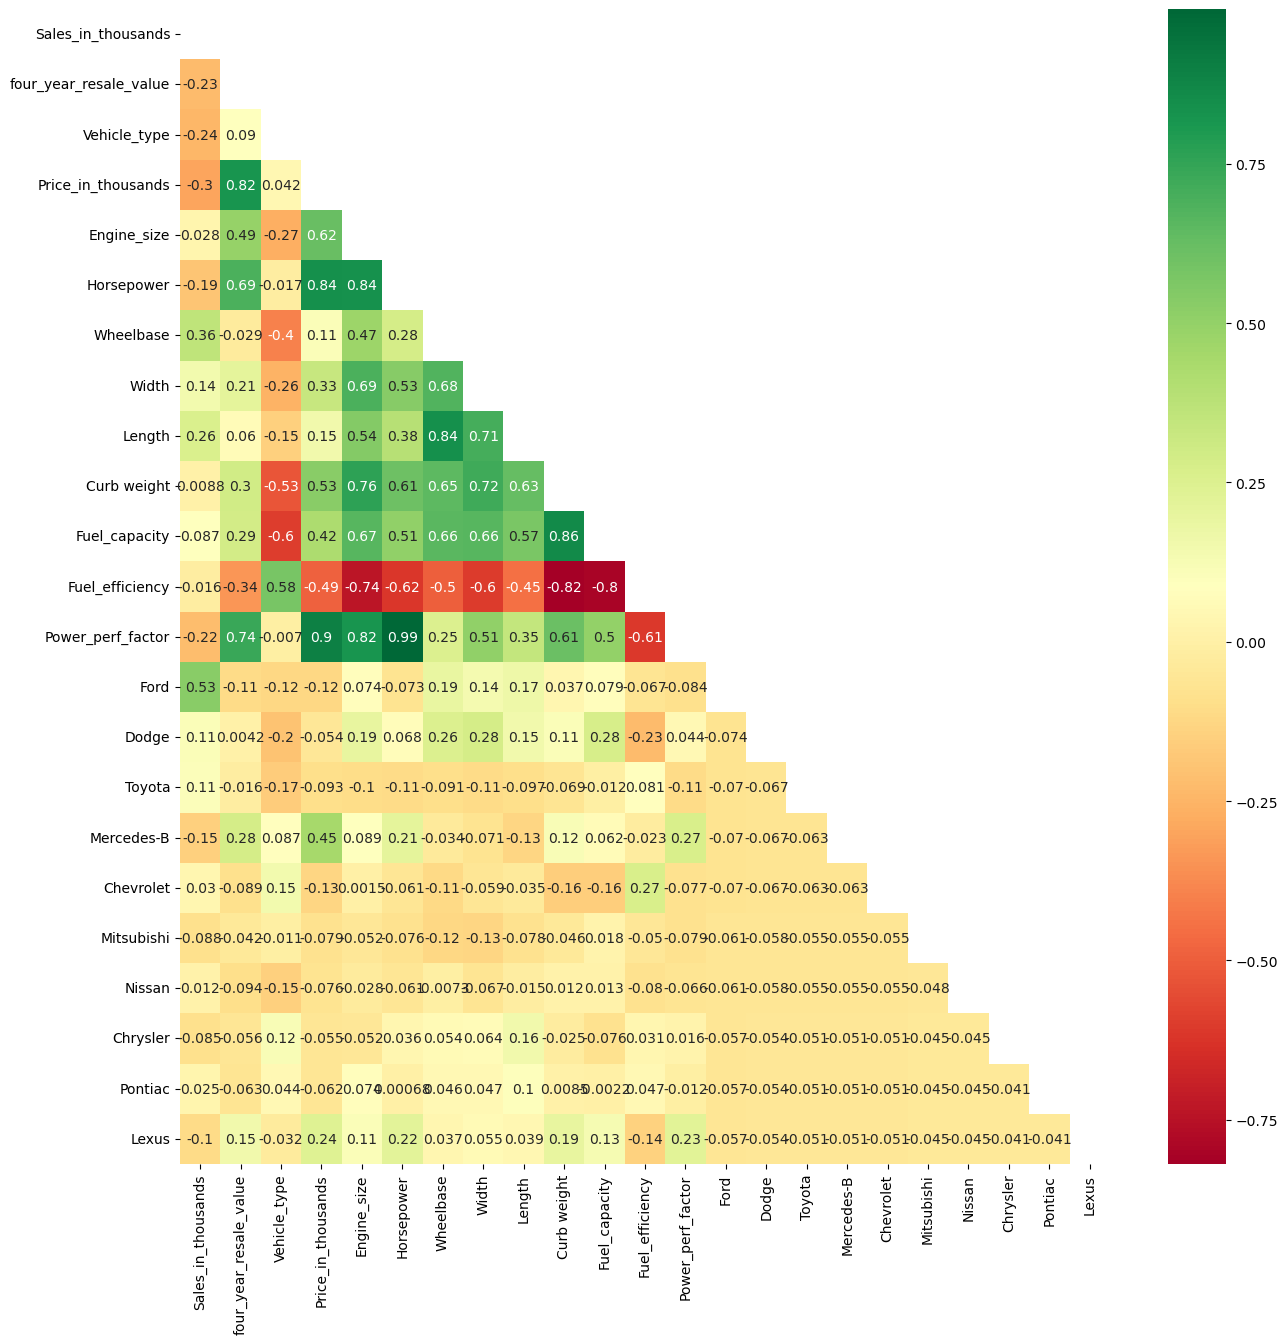

In [23]:
# corelation
plt.figure(figsize=(15,15))
cor =  df.corr()
matrix = np.triu(cor)

sns.heatmap(data=cor ,cmap='RdYlGn',annot=True, mask=matrix)
plt.show()

In [24]:
# Summary of Corealtion >0.72 & <-0.72
#
# price in thousands and price in thousands
# horse power with - price_in_thiusands, engineSize
# length with wheelebase and width
# curb_weight with Engine Size & width
# fuel_capacity with  curb_weight
# fuel_efficency with engine size , curb_weight ,fuel_capacity
# power perf_factor with price_in thousands , engine_size,HorsePower

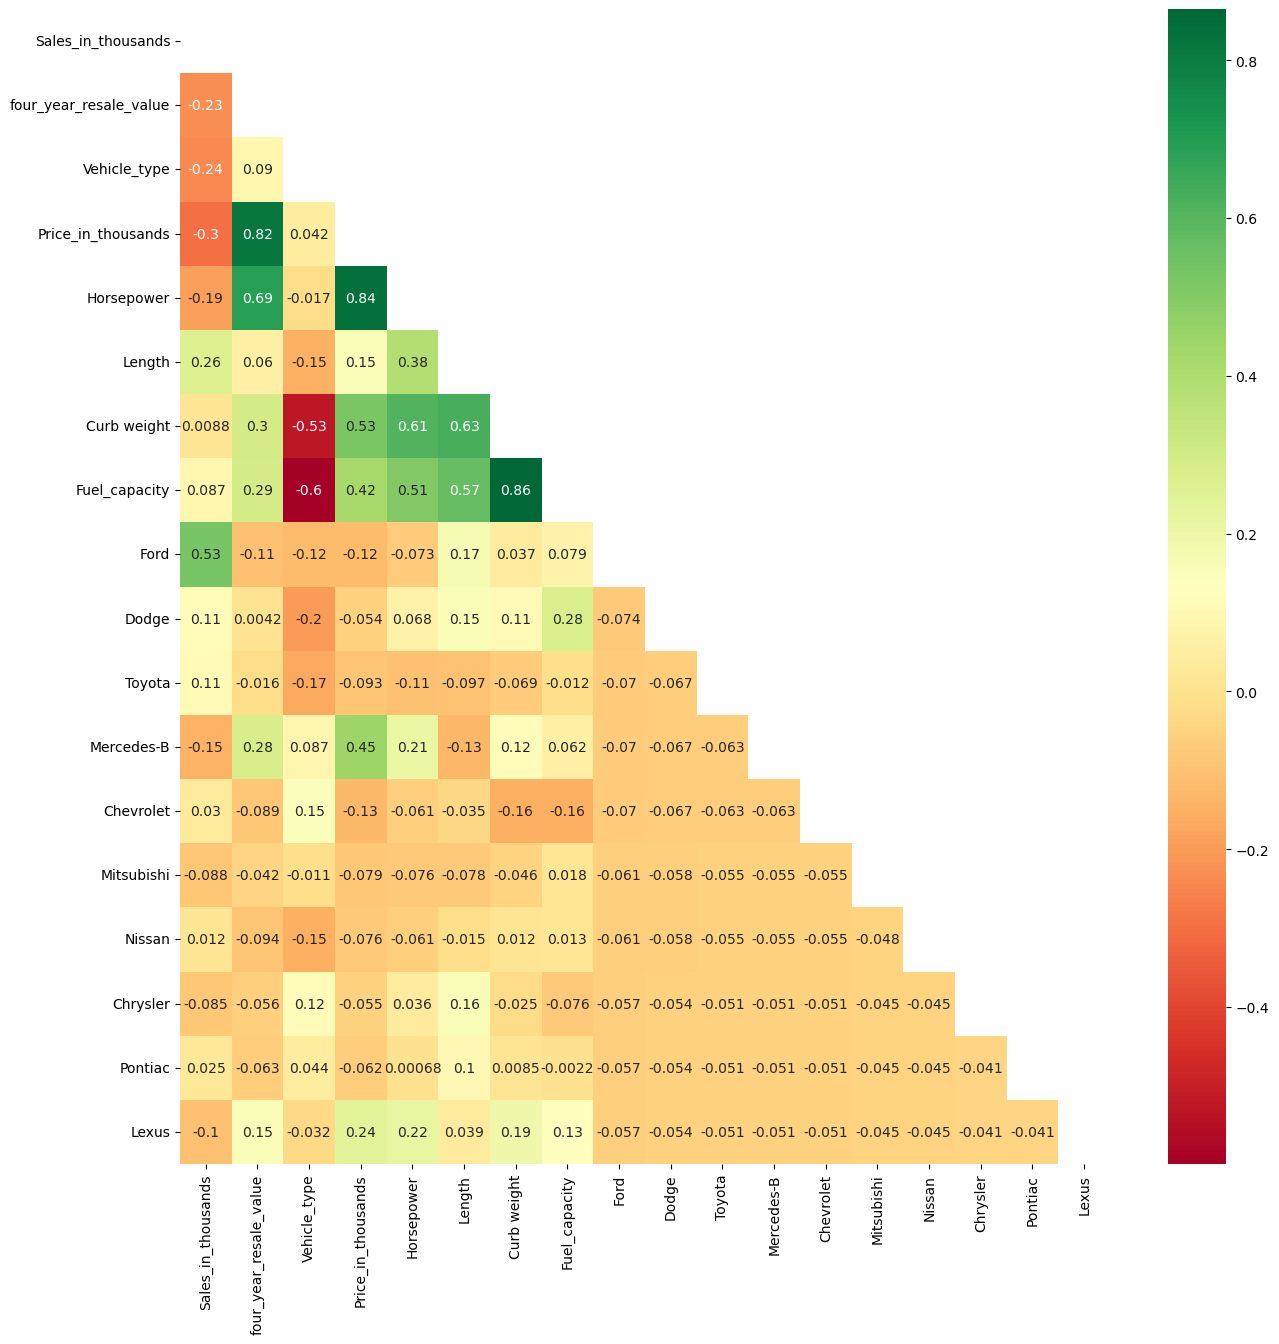

In [25]:
df.drop(['Power_perf_factor','Width','Fuel_efficiency',"Engine_size","Wheelbase"] , axis=1 , inplace=True)

# corelation
plt.figure(figsize=(15,15))
cor =  df.corr()
matrix = np.triu(cor)

sns.heatmap(data=cor ,cmap='RdYlGn',annot=True, mask=matrix)
plt.show()

## Making Dummies

In [26]:
df_dummies = pd.get_dummies(data = df , drop_first=True)

df_dummies

,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Horsepower,Length,Curb weight,Fuel_capacity,Ford,Dodge,Toyota,Mercedes-B,Chevrolet,Mitsubishi,Nissan,Chrysler,Pontiac,Lexus
0,16.919,16.360,1,21.50,140.0,172.4,2.639,13.2,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,1,28.40,225.0,192.9,3.517,17.2,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725,1,42.00,210.0,196.6,3.850,18.0,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,1,23.99,150.0,178.0,2.998,16.4,0,0,0,0,0,0,0,0,0,0
5,18.780,23.555,1,33.95,200.0,192.0,3.561,18.5,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,8.133,1,24.40,160.0,176.6,3.042,15.8,0,0,0,0,0,0,0,0,0,0
153,15.245,9.167,1,27.50,168.0,185.9,3.208,17.9,0,0,0,0,0,0,0,0,0,0
154,17.531,9.600,1,28.80,168.0,186.2,3.259,17.9,0,0,0,0,0,0,0,0,0,0
155,3.493,15.167,1,45.50,236.0,185.7,3.601,18.5,0,0,0,0,0,0,0,0,0,0


In [27]:
col = list(df_dummies.columns)
cols = col.remove("Price_in_thousands")
print(cols)

None


In [28]:
#engine size & 4_year_resale_value.. so we cant drop these 2 is highly relevent wrt price

## sipliting into x and y

In [29]:
df_dummies.dropna(inplace=True)

In [30]:
y = np.log1p(df_dummies['Price_in_thousands'])
x = np.log1p(df_dummies.drop(["Price_in_thousands"], axis=1))

In [31]:
# Feature Selection using lasso

## spliting into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
y_train.shape , y_test.shape

((114,), (38,))

In [34]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fitting data
x_train = scaler.fit_transform(x_train)
#transforming data onto x adn y train
x_test = scaler.transform(x_test)



# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error

dt1 = DecisionTreeRegressor()

In [36]:
parameters = {"max_depth" : (180,190,200),
              "max_features" : ("auto","sqrt","log2"),
              "max_leaf_nodes" : (8,9,10,20),
              "min_samples_leaf" : (8,9,10,20),
              "min_samples_split" : (8,9,10,11) }

dt_grid = GridSearchCV(dt1 , param_grid=parameters,refit=True, n_jobs=-1 ,cv=10,verbose=1)

dt_grid.fit(x_train,y_train)

print(dt_grid.best_params_ , dt_grid.best_score_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
{'max_depth': 190, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 8, 'min_samples_split': 10} 0.617526988932475


In [37]:
dt =DecisionTreeRegressor(max_depth= 200,
                           max_features= 'auto',
                           max_leaf_nodes= 9,
                           min_samples_leaf= 9,
                           min_samples_split= 8
                           )

dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

print("Train Score is :-" , dt.score(x_train,y_train) )
print("Test Score is :-" , dt.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error =" , mean_squared_error(y_test,y_pred_dt))
print("Root mean Square error =" , np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Train Score is :- 0.8642360484243822
Test Score is :- 0.5389467213165382
MAE = 0.20907632522074363
Mean Squared Error = 0.07077337232101463
Root mean Square error = 0.26603265273461196


In [38]:
dt_r2 = r2_score(y_test,y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test,y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test,y_pred_dt))

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
  
regf_params = {"n_estimators":(10,20,30),
                'max_depth':(6,7,8,9),
               'min_samples_leaf':[3,4,5,6],
                'min_samples_split':[2,3,5,4],
                'max_features':['auto','sqrt']}

In [40]:
rf_GS = GridSearchCV(estimator=rf ,param_grid=regf_params,n_jobs=-1,cv=5,verbose=2)

rf_GS.fit(x_train,y_train)

rf_GS.best_params_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 30}

In [41]:
rf = RandomForestRegressor(max_depth= 7,
                             max_features= 'auto',
                             min_samples_leaf= 6,
                             min_samples_split= 9,
                             n_estimators= 10)

# fitting the model
rf.fit(x_train,y_train)

#predicting y
y_pred_rf = rf.predict(x_test)

print("Train Score is :-" , rf.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error =" , mean_squared_error(y_test,y_pred_rf))
print("Root mean Square error =" , np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Train Score is :- 0.919647703634057
Test Score is :- 0.8233600272982212
MAE = 0.1334420859097111
Mean Squared Error = 0.02711488483607498
Root mean Square error = 0.1646659795952855


In [42]:
rf_r2 = r2_score(y_test,y_pred_rf)
        
rf_mae = mean_absolute_error(y_test, y_pred_rf)
    
rf_mse = mean_squared_error(y_test,y_pred_rf)
                 
rf_rmse = np.sqrt(rf_mse)

# Adaboost

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
ada_boost = AdaBoostRegressor(learning_rate=0.15,random_state =45, n_estimators=300)
# fitting data
ada_boost.fit(x_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(x_test)

In [45]:
# predicting accuracy
print("Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))

Train Score is :- 0.9467148849314118
Test Score is :- 0.8401752575019663
MAE = 0.12327986816003915


In [46]:
ada_r2 = r2_score(y_test, y_pred_ada)
ada_mae = mean_absolute_error(y_test, y_pred_ada)
ada_mse = mean_squared_error(y_test , y_pred_ada)
ada_rmse = np.sqrt(ada_mse)

# XgBoost

In [47]:
!pip install xgboost

In [48]:
import xgboost as xgb

regressor=xgb.XGBRegressor(eval_metric='rmse')

from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {"learning_rate": [0.1,0.09,0.11],
                "max_depth":    [4,6,5],
              "n_estimators": [203,205,202,201,204]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=10).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_ ,"\n" ,"And best score is " , search.best_score_)

The best hyperparameters are  {'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 204} 
 And best score is  0.7342783436398602


In [50]:
regressor=xgb.XGBRegressor(learning_rate = 0.1,
                           n_estimators  = 201,
                           max_depth     = 4,
                           eval_metric='rmse')

regressor.fit(x_train, y_train) 

# Predict the model
y_pred_xg = regressor.predict(x_test)

# RMSE Computation
print("Train Score is :-" ,  regressor.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_xg))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_xg))

Train Score is :- 0.9998981276883024
Test Score is :- 0.8126935020324859
MAE = 0.13622324042795414


In [51]:
xg_r2 = r2_score(y_test, y_pred_xg)
xg_mae = mean_absolute_error(y_test, y_pred_xg)
xg_mse = mean_squared_error(y_test,y_pred_xg)
xg_rmse = np.sqrt(xg_mse)

In [52]:
model_index = ['Decision Tree', 'Random Forest', 
              'AdaBoost', 'XgBoost']

models = pd.DataFrame({
    
    'r2_Score': [dt_r2,rf_r2,ada_r2,xg_r2],
    
    'MAE' : [dt_mae,rf_mae,ada_mae,xg_mae],
    
    "MSE" : [dt_mae,rf_mae , ada_mae , xg_mae],
    
    'RMSE' : [dt_rmse,rf_rmse,ada_rmse,xg_rmse]} , index=model_index)
models.sort_values(by='r2_Score', ascending=False)

,r2_Score,MAE,MSE,RMSE
AdaBoost,0.840175,0.123280,0.123280,0.156632
Random Forest,0.823360,0.133442,0.133442,0.164666
XgBoost,0.812694,0.136223,0.136223,0.169565
Decision Tree,0.538947,0.209076,0.209076,0.266033


### Picking model for Deployment

In [53]:
import pickle
pickle.dump(ada_boost ,open("RegressionModel.pkl","wb" ))

### Loading Pickle file

In [54]:
pickle_model = pickle.load(open("RegressionModel.pkl","rb"))

In [57]:
df_dummies.head(1).values.reshape(1,-1)

array([[ 16.919,  16.36 ,   1.   ,  21.5  , 140.   , 172.4  ,   2.639,
         13.2  ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ]])

In [58]:
pickle_model.predict(df_dummies.drop(["Price_in_thousands"],axis=1).head(1).values.reshape(1,-1))

array([4.14305874])

## Model is ready for deployment